# **Introduction**

Greetings, fellow gamers and data enthusiasts! In this project we are going see the evolution of video games from 1980-2023. Video games, once a niche hobby, have transformed into a global phenomenon, captivating audiences of all ages and backgrounds. 

Since the release of the first commercial video game, "Computer Space," in 1971, the industry has continued to evolve and expand, with new technologies and platforms constantly being introduced.The rise of online gaming has allowed gamers to connect and play with others from all over the world, creating a global community that is constantly evolving and growing.

Our goal is to explore and analyze the dataset, focusing on identifying the most popular game genres, determining the teams that produce the highest number of popular games, and observing how the distribution of these genres and teams has evolved over time. 

# **About Dataset**

This dataset contains a list of video games dating from 1980 to 2023, it also provides things such as release dates, user review rating, and critic review rating.

Not only can you find the popular games mentioned here but also the obscure indie ones which we have forgotten in time!

Backloggd is a video game collection website mixed with social elements to focus on bringing your gaming profile to life. Create a free account to get started on logging the games you've played, and then rating and reviewing as you go! Go into detail with logging platforms, time played, and even a daily journal to keep track your daily gaming progress with playthroughs. It's all tailored to how much you want to log, so that your profile fits you. Then outside of that you can create lists of games, friend other users, follow their activities, and so much more!

### IMPORTING LIBRARIES

first, we will install all the libraries we are going to use in this project and for that we will use pacman importing and install all the libraries. 

In [1]:
pacman::p_load(pacman, tidyverse, ggplot2, dplyr, lubridate, rio, stringr,knitr)

###  LOADING THE DATASET

And now we will import the game database using rio library.

In [2]:
games<- import("/kaggle/input/popular-video-games-1980-2023/games.csv")

### DATA OVERVIEW

We start by getting an overview of the data by displaying the DataFrame and its summary information.

In [3]:
head(games) #display the first few rows of a data frame

,V1,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between.","[""""The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you've experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo."""", 'a replay solidified my love for elden ring. so easily my favorite game of all time. actually beating malenia this time was also an amazing feeling. i just love being in this world man its the greatest of all time', 'The game is absolutely beautiful, with so much to do. The replayability is crazy. And it never gets old with it too.', 'Took everything great about the Soulsborne games and make it 100% better.', 'I play with my overlevelled friend every time and we still fail sometimes (he’s on NG6), insanely difficult game lol\n \n gorgeous graphics, animations, everything about this game is so beautiful. deserves all the hype it gets. If you have a powerful enough pc I definitely recommend you play it on there, if you use keyboard, you’ll want to change the keybinds because the defaults are ass.', """"Tied as my favorite souls game with Bloodborne, truly one I'll keep coming back too.""""]",17K,3.8K,4.6K,4.8K
2,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']","A rogue-lite hack and slash dungeon crawler in which Zagreus, son of Hades the Greek god of the dead, attempts to escape his home and his oppressive father by fighting the souls of the dead through the various layers of the ever-shifting underworld, while getting to know and forging relationships with its inhabitants.","['convinced this is a roguelike for people who do not like the genre. The art is technically good but the aesthetic does very little for me, too clean or something. idk wish I liked it but I do not', 'incredible art, a banger soundtrack a surprisingly charming storyline and a big red dog. hades has very smooth gameplay but after playing it for a while it just feels like youre doing the same 3 hit combo ove and over again, which dont get me wrong that combo feels great to do but once i becomes muscle memory you kinda go into autopilot. also i think the boons are cool but i would like to see them change the flow of combat a bit more, there are some cool ones like the grape boon that can change the way you play but most of them are just upgrades that dont really change the gameplay or strategy. other then those 2 small gripes the game is fantastic.', """"People tell me this game gets really really good at some point but i've beaten entire games in the amount of time I gave this game."""", 'Não sou muito de jogo indie, admito que joguei poucos, mas devo dizer que Hades foi um dos melhores jogos que joguei na vida, facilmente no top 15. Toda sua arte, dublagem, gameplay, carisma dos personagens, é tudo incrivel', """"I can't shake the feeling that I am thoroughly bored playing Hades. I've picked up Hades three times over the last few years, and three times I've found myself putting down the controller after a handful of hours, especially after reaching the third stage, and I couldn't figure out why it wasn't working for me. After giving it a few good goes, I've finally managed to pin down what it is that just doesn't click for me about Hades."""", 'One of my favorites in the rogue-likes/lites, only being beat by bindin

In [4]:
glimpse(games)#To get better overview 

Rows: 1,512
Columns: 14
$ V1                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Title               <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breat…
$ `Release Date`      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "S…
$ Team                <chr> "['Bandai Namco Entertainment', 'FromSoftware']", …
$ Rating              <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, …
$ `Times Listed`      <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ `Number of Reviews` <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ Genres              <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', …
$ Summary             <chr> "Elden Ring is a fantasy, action and open world ga…
$ Reviews             <chr> "[\"\"The first playthrough of elden ring is one o…
$ Plays               <chr> "17K", "21K", "30K", "28K", "21K", "33K", "7.2K", …
$ Playing             <chr> "3.8K", "3.2K", "2.5K", "679", "2.4K", "1.8K", "1.…
$ Backlogs      

In [5]:
summary(games)#Display summary information of dataframe

       V1            Title           Release Date           Team          
 Min.   :   0.0   Length:1512        Length:1512        Length:1512       
 1st Qu.: 377.8   Class :character   Class :character   Class :character  
 Median : 755.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 755.5                                                           
 3rd Qu.:1133.2                                                           
 Max.   :1511.0                                                           
                                                                          
     Rating      Times Listed       Number of Reviews     Genres         
 Min.   :0.700   Length:1512        Length:1512        Length:1512       
 1st Qu.:3.400   Class :character   Class :character   Class :character  
 Median :3.800   Mode  :character   Mode  :character   Mode  :character  
 Mean   :3.719                                                           
 3rd Qu.:4.100                

> ##### Checking for dublicates and null values

In [6]:
any(duplicated(games))#checking  if there any dublicates in dataframe

[1] FALSE

In [7]:
any(is.na(games))#Checking if there any null values in whole dataframe

[1] TRUE

In [8]:
sum(is.na(games))#total null values 

[1] 13

In [9]:
colSums(is.na(games))#count of null values in each column 

V1             Title      Release Date              Team 
                0                 0                 0                 0 
           Rating      Times Listed Number of Reviews            Genres 
               13                 0                 0                 0 
          Summary           Reviews             Plays           Playing 
                0                 0                 0                 0 
         Backlogs          Wishlist 
                0                 0

### DATA CLEANING AND FORMATING
> ##### Removing null values 
> We observe that there are total 13 null values which are only  in rating column.  So,now we will remove each row which has null values.

In [10]:
 games_cleaned<-games%>%     #removing null values
filter(complete.cases(.))
glimpse(games_cleaned)

Rows: 1,499
Columns: 14
$ V1                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Title               <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breat…
$ `Release Date`      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "S…
$ Team                <chr> "['Bandai Namco Entertainment', 'FromSoftware']", …
$ Rating              <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, …
$ `Times Listed`      <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ `Number of Reviews` <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ Genres              <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', …
$ Summary             <chr> "Elden Ring is a fantasy, action and open world ga…
$ Reviews             <chr> "[\"\"The first playthrough of elden ring is one o…
$ Plays               <chr> "17K", "21K", "30K", "28K", "21K", "33K", "7.2K", …
$ Playing             <chr> "3.8K", "3.2K", "2.5K", "679", "2.4K", "1.8K", "1.…
$ Backlogs      

In [11]:
games1<- na.omit(games)  #alternative method for removing null values(jfk)
glimpse(games1)

Rows: 1,499
Columns: 14
$ V1                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Title               <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breat…
$ `Release Date`      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "S…
$ Team                <chr> "['Bandai Namco Entertainment', 'FromSoftware']", …
$ Rating              <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, …
$ `Times Listed`      <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ `Number of Reviews` <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ Genres              <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', …
$ Summary             <chr> "Elden Ring is a fantasy, action and open world ga…
$ Reviews             <chr> "[\"\"The first playthrough of elden ring is one o…
$ Plays               <chr> "17K", "21K", "30K", "28K", "21K", "33K", "7.2K", …
$ Playing             <chr> "3.8K", "3.2K", "2.5K", "679", "2.4K", "1.8K", "1.…
$ Backlogs      

In [12]:
any(is.na(games_cleaned)) #checking for null again

[1] FALSE

In [13]:
missing<-games%>%          #let check the rows which have null values in it 
filter(!complete.cases(.))
View(missing)

V1,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business Unit III']",NA,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-playing game developed and published by Square Enix. It is the sixteenth game in the mainline Final Fantasy series and will be released for the PlayStation 5. It is being produced by Naoki Yoshida and directed by Hiroshi Takai.,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NA,105,105,"['Adventure', 'Shooter']",,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NA,192,192,[],This next standalone chapter in the FINAL FANTASY VII remake trilogy,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NA,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, Lies of P is an action souls-like game set in a dark Belle Époque world. Guide Pinocchio on his unrelenting journey to become human.",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NA,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape plan. You are the mysterious and troubled Judas. Your only hope for survival is to make or break alliances with your worst enemies. Will you work together to fix what you broke – or will you leave it to burn?,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NA,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza 7 and Like a Dragon 8.,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No. 3']",NA,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is the sequel to The Legend of Zelda: Breath of the Wild. The setting for Link’s adventure has been expanded to include the skies above the vast lands of Hyrule.,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NA,250,250,['Adventure'],"The story of Cal Kestis continues in Star Wars Jedi: Survivor, a third-person, galaxy-spanning, action-adventure game from Respawn Entertainment, developed in collaboration with Lucasfilm Games. This narratively driven, single-player title picks up five years after the events of Star Wars Jedi: Fallen Order and follows Cal’s increasingly desperate fight as the galaxy descends further into darkness. Pushed to the edges of the galaxy by the Empire, Cal will find himself surrounded by threats new and familiar. As one of the last surviving Jedi Knights, Cal is driven to make a stand during the galaxy’s darkest times — but how far is he willing to go to protect himself, his crew, and the legacy of the Jedi Order?",[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co. Ltd']",NA,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a remake of the PS2 game We Love Katamari.,[],3,0,74,291


> ##### Removing Unnecessary columns
We will remove the 'Summary' and 'Reviews' columns from the DataFrame using the subset().

In [14]:
games_cleaned <- subset(games_cleaned, select = -c(Summary, Reviews))

In [15]:
glimpse(games_cleaned)

Rows: 1,499
Columns: 12
$ V1                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Title               <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breat…
$ `Release Date`      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "S…
$ Team                <chr> "['Bandai Namco Entertainment', 'FromSoftware']", …
$ Rating              <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, …
$ `Times Listed`      <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ `Number of Reviews` <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6…
$ Genres              <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', …
$ Plays               <chr> "17K", "21K", "30K", "28K", "21K", "33K", "7.2K", …
$ Playing             <chr> "3.8K", "3.2K", "2.5K", "679", "2.4K", "1.8K", "1.…
$ Backlogs            <chr> "4.6K", "6.3K", "5K", "4.9K", "8.3K", "1.1K", "4.5…
$ Wishlist            <chr> "4.8K", "3.6K", "2.6K", "1.8K", "2.3K", "230", "3.…


> ##### Converting 'nk' format to numerical
If we observe "Playing", "Plays", "Backlogs", "Wishlist", "Times Listed", "Number of Reviews" columns, we could see that these columns values are in 'nK' format which represents that values are in thousands and also these columns are in 'string' data type.
Now, then we will covert the 'nk' format numerical and change it's data type to 'double'.

In [16]:
#function to convert 'nk' format. 
convert_k <- function(x){ if(grepl("k$",x,ignore.case = TRUE)) #finding 'nk' format values
{ as.double(sub("k","",x,ignore.case = TRUE))*1000} #substituting  'k' with 1000
else{ as.double(x)}} #converting rest to double


In [17]:
columns_to_convert<- c("Playing", "Plays", "Backlogs", "Wishlist", "Times Listed", "Number of Reviews")
games_cleaned[columns_to_convert] <- lapply(games_cleaned[columns_to_convert], convert_k)
glimpse(games_cleaned)#applying the function to each column

Warning message in if (grepl("k$", x, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (grepl("k$", x, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (grepl("k$", x, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (grepl("k$", x, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (grepl("k$", x, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (grepl("k$", x, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”


Rows: 1,499
Columns: 12
$ V1                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Title               <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breat…
$ `Release Date`      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "S…
$ Team                <chr> "['Bandai Namco Entertainment', 'FromSoftware']", …
$ Rating              <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, …
$ `Times Listed`      <dbl> 3900, 2900, 4300, 3500, 3000, 2300, 1600, 2100, 86…
$ `Number of Reviews` <dbl> 3900, 2900, 4300, 3500, 3000, 2300, 1600, 2100, 86…
$ Genres              <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', …
$ Plays               <dbl> 17000, 21000, 30000, 28000, 21000, 33000, 7200, 92…
$ Playing             <dbl> 3800, 3200, 2500, 679000, 2400, 1800, 1100, 759000…
$ Backlogs            <dbl> 4600, 6300, 5000, 4900, 8300, 1100, 4500, 3400, 77…
$ Wishlist            <dbl> 4800, 3600, 2600, 1800, 2300, 230000, 3800, 3300, …


> ##### Removing slashes, brackets and unnecessary spaces
Now all 'nk' format values are converted to numerical but if observe 'Team' and 'Genres' columns there are lots of brackets, slashes and unnecessary spaces so, lets remove those.

In [18]:
games_cleaned <- games_cleaned%>%
mutate(Genres = gsub("\\[|\\]|'", "", Genres))%>% #substituting brackets and slashes' pattern 
mutate(Team = gsub("\\[|\\]|'", "", Team))%>%
mutate(Genres= gsub("\\s+","",Genres))%>% #substituting unnecessary spaces 
mutate(Team=gsub("\\s+","",Team))
glimpse(games_cleaned)

Rows: 1,499
Columns: 12
$ V1                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Title               <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breat…
$ `Release Date`      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "S…
$ Team                <chr> "BandaiNamcoEntertainment,FromSoftware", "Supergia…
$ Rating              <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, …
$ `Times Listed`      <dbl> 3900, 2900, 4300, 3500, 3000, 2300, 1600, 2100, 86…
$ `Number of Reviews` <dbl> 3900, 2900, 4300, 3500, 3000, 2300, 1600, 2100, 86…
$ Genres              <chr> "Adventure,RPG", "Adventure,Brawler,Indie,RPG", "A…
$ Plays               <dbl> 17000, 21000, 30000, 28000, 21000, 33000, 7200, 92…
$ Playing             <dbl> 3800, 3200, 2500, 679000, 2400, 1800, 1100, 759000…
$ Backlogs            <dbl> 4600, 6300, 5000, 4900, 8300, 1100, 4500, 3400, 77…
$ Wishlist            <dbl> 4800, 3600, 2600, 1800, 2300, 230000, 3800, 3300, …


> ##### Converting 'Release Date' to datetime format
'Release Date' column is also in 'string' datatype we will convert it to datetime format.

In [19]:
games_cleaned$`Release Date`<- mdy(games_cleaned$`Release Date`) #converting release Date to mdy format

Warning message:
“ 2 failed to parse.”


In [20]:
write.csv( games_cleaned,file="games_cleaned.csv", row.names=FALSE) #exporting clean data as csv 

### Genre and team analysis 
We perform analysis on the genres and teams associated with the games.
To analysis 'Genre' and 'Team' column we need to remove commas first so that we could easily know there occuring count.

In [21]:
games_cleaned1<- games_cleaned %>% #removing commas from "Genres"
separate_rows(Genres, sep = ",")

In [22]:
games_cleaned2<- games_cleaned %>% #removing commas from "team"
 separate_rows(Team, sep = ",")

In [23]:
genre_counts <- games_cleaned1 %>% #retrieving total counts of games according to their Genre
  count(Genres, sort= TRUE)
kable(genre_counts)



|Genres            |    n|
|:-----------------|----:|
|Adventure         | 1007|
|RPG               |  516|
|Shooter           |  351|
|Platform          |  329|
|Indie             |  283|
|Puzzle            |  175|
|Brawler           |  157|
|Strategy          |  142|
|Simulator         |  125|
|TurnBasedStrategy |   99|
|Arcade            |   72|
|Fighting          |   72|
|VisualNovel       |   71|
|Tactical          |   50|
|Point-and-Click   |   46|
|Racing            |   42|
|Music             |   25|
|Sport             |   25|
|Card&BoardGame    |   16|
|RealTimeStrategy  |   10|
|Quiz/Trivia       |    4|
|MOBA              |    3|
|                  |    2|
|Pinball           |    1|

![Imgur](https://i.imgur.com/yvC18Ee.png)

We could clearly observe from above graph that the most dominating genre is **Adventure** holds 27.81% of total genres which is nearly double the second most prominent genre **RPG**(holds 14.25%). It is important to note that many of the games have more than one genre. For example **Elden Ring** have both adventure and RPG as genres and **hades** have **four genres**(Adventure,Brawler,Indie,RPG).

In [24]:
team_counts <- games_cleaned2 %>%#retrieving total counts of games each team have
group_by(Team)%>%
summarise(count=n())%>%
arrange(desc(count))
head(team_counts)

Team,count
<chr>,<int>
Nintendo,244
Capcom,89
SquareEnix,77
Sega,63
ElectronicArts,58
SonyComputerEntertainment,44


![Imgur](https://i.imgur.com/3HmO3k6.png)

When we talk about teams, Nintendo stands out in the first place, representing 22.10% of the total games, followed by Capcom (8.06%) and Square Enix (6.97%).

> ##### Most Played games in each Genre
We already know which team has most of games and which genre is most prominent. Now, let's explore the most played game in each genre.

In [25]:
result2 <- games_cleaned1 %>%
  select(Title, Genres, Plays) %>%
  group_by(Genres, Title) %>%
  summarize(Plays = max(Plays)) %>%
  group_by(Genres) %>%
  filter(Plays == max(Plays))%>%
  arrange(desc(Plays))
kable(result2)

`summarise()` has grouped output by 'Genres'. You can override using the
`.groups` argument.




|Genres            |Title                                    |  Plays|
|:-----------------|:----------------------------------------|------:|
|Adventure         |Ninja Gaiden Black                       | 992000|
|Brawler           |Ninja Gaiden Black                       | 992000|
|RPG               |Alpha Protocol                           | 987000|
|Shooter           |Alpha Protocol                           | 987000|
|Fighting          |Twisted Metal                            | 986000|
|Racing            |Twisted Metal                            | 986000|
|Indie             |Chicory: A Colorful Tale                 | 984000|
|Puzzle            |Chicory: A Colorful Tale                 | 984000|
|VisualNovel       |Wonderful Everyday: Down the Rabbit-Hole | 982000|
|Platform          |Mega Man ZX Advent                       | 976000|
|                  |Peggle Deluxe                            | 939000|
|Sport             |Mario Strikers: Battle League            | 932000|
|Arc

As you may have noticed, the repetition of game titles occurs because many games belong to more than one genre.

> ##### Games Released each Year
Now, we are going to find out how many games were released each year.

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


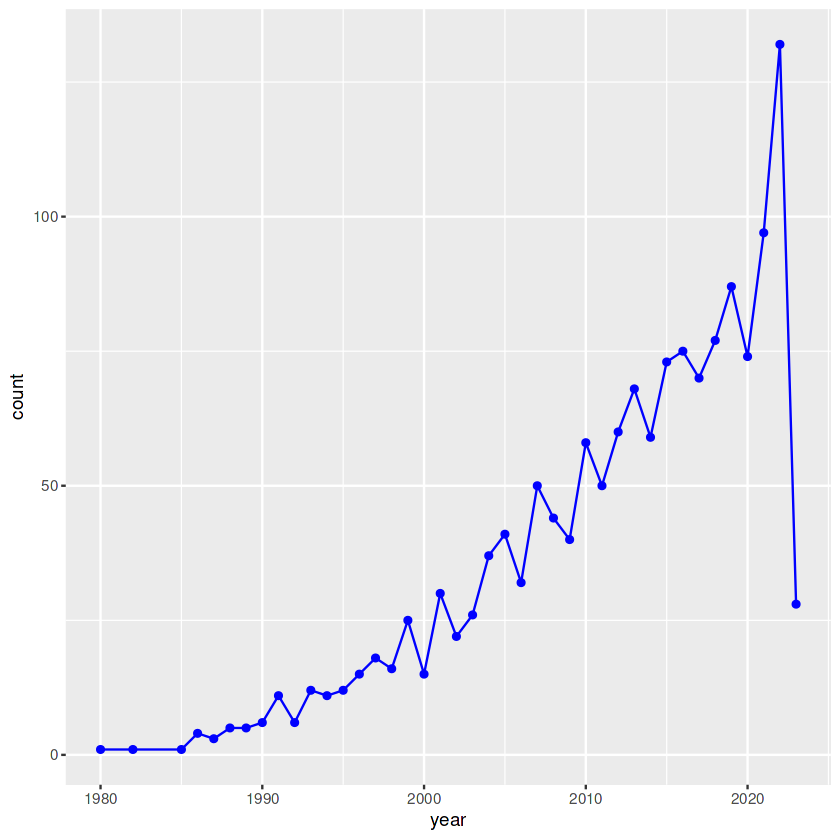

In [26]:
result <- games_cleaned %>%
  group_by(year= year(`Release Date`)) %>%
  summarize(count=n())
ggplot(result, aes(x = year , y = count)) +
geom_line(colour = "blue")+
geom_point(colour= "blue")

We can observe that there is a drastic increase in game releases after the year **2020**. This may be because of the **COVID-19 pandemic**, as people were spending more time at home, so the demand for games was high during that time. In fact, one of the most famous FPS games, Valorant, was also released during the pandemic, and I myself spent a lot of time playing it during lockdown.

![Imgur](https://i.imgur.com/kpKXMqN.png)

Next, let's explore the most played games. As we observed above As observed earlier, **Ninja Gaiden Black** is the most played game, followed by **Alpha Protocol**, **Twisted Metal**, and **Chicory: A Colorful Tale**.
An interesting fact about **Ninja Gaiden Black** is that it sold 362,441 copies in North America within its first month of release. However,Japanese sales were less impressive.

![Imgur](https://i.imgur.com/lH3JAWD.png)

And if talk about the most actively engaged games, we have **It Takes Two** on top, which is  also awarded as game of the Year in 2021, followed by **Kirby And the Forgotten Land**, **Vampire Survivors** and **Death Stranding**.

![Imgur](https://i.imgur.com/NxQ2lXx.png)


So,Here we have Rating vs Plays scatterpoint graph. In this graph we can easily conclude that the top-right games would the best games as those games are most played and have good rating. And we observed that the top five games which are most played with high rating are **Ninja Gaiden Black**,**Chircory:A Colourfull Tails**,**Wonderfull Everyday:Down The Rabbit Hole**,**Mega Man ZX Advent** and **Twisted Metal**.

# **Summary**
In our analysis of the video game dataset, several key observations emerge:

**Genre Dominance**: Adventure emerges as the most dominant genre, representing 27.81% of total genres, followed by RPG at 14.25%. Notably, many games feature multiple genres, exemplified by titles like Elden Ring and Hades.

**Top Game Developers**: Nintendo leads the pack in terms of game development, with a significant share of 22.10% of total games, followed by Capcom (8.06%) and Square Enix (6.97%).

**Post-2020 Surge in Releases**: There's a noticeable spike in game releases post-2020, likely influenced by the COVID-19 pandemic and increased demand for home entertainment. For example, the release of the acclaimed FPS game, Valorant, during the pandemic underscores this trend.

**Most Played Games**: Ninja Gaiden Black emerges as the most played game, followed by Alpha Protocol, Twisted Metal, and Chicory: A Colorful Tale. Notably, Ninja Gaiden Black achieved impressive sales figures in North America within its first month of release.

**Active Engagement**: It Takes Two leads the pack as the most actively engaged game, earning the title of Game of the Year in 2021. Other highly engaged titles include Kirby And the Forgotten Land, Vampire Survivors, and Death Stranding.

**Most Popular Games**: Our analysis reveals that certain games achieve both high ratings and high play counts. The top five games in this category are Ninja Gaiden Black, Chicory: A Colorful Tale, Wonderful Everyday: Down The Rabbit Hole, Mega Man ZX Advent, and Twisted Metal.